<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/PCA_complete_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
compound_sample_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Hitlist_non_dublicates.csv')
#print(compound_sample_df.head())
compound_sample_df = compound_sample_df.drop(columns= 'Formula (mol ion)').set_index('Unnamed: 0')
print(compound_sample_df.head())

                                                 Auto_5_gp_df  Auto_4_gp_df  \
Unnamed: 0                                                                    
4-Ethylphenylacetylene                                    0.0           0.0   
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-              0.0           0.0   
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde           0.0           0.0   
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide             0.0           0.0   
1-(2-Vinylphenyl)ethanone                                 0.0           0.0   

                                                 Auto_3_gp_df  Auto_2_gp_df  \
Unnamed: 0                                                                    
4-Ethylphenylacetylene                                    0.0           0.0   
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-              0.0           0.0   
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde           0.0           0.0   
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide      

In [3]:
de_filtered_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Filtered_Result_With_Detection_Frequency_02.csv')
print(de_filtered_df.head())
print(de_filtered_df.columns)
print(de_filtered_df.index)
# Set the index to the "Unnamed: 0" column
de_filtered_df = de_filtered_df.drop(columns=['Formula (mol ion)', 'Detection Frequency']).set_index('Unnamed: 0')
print(de_filtered_df.head())

                                          Unnamed: 0 Formula (mol ion)  \
0  1,2-Benzenediol, O-(4-ethylbenzoyl)-O'-proparg...          C19H16O5   
1              3,4-Methylenedioxyphenyl vinyl ketone           C10H8O3   
2                           Naphthalene, 1-isocyano-            C11H7N   
3  Oxamide, N-(3-methoxypropyl)-N'-cycloheptylide...        C13H23N3O3   
4                                  Heptane, 4-azido-           C7H15N3   

   Detection Frequency  Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  \
0             0.250000      0.000000      0.000000      0.007362   
1             0.333333      0.162008      0.073237      0.120008   
2             0.250000      0.007738      0.000000      0.000000   
3             0.500000      0.002009      0.000000      0.000000   
4             0.250000      0.000000      0.000000      0.422010   

   Auto_2_gp_df  Auto_1_gp_df  Zafira_2_gp_df  Zafira_1_gp_df  Auto_5_pm_df  \
0      0.000000      0.000000        0.006410        0.018978      

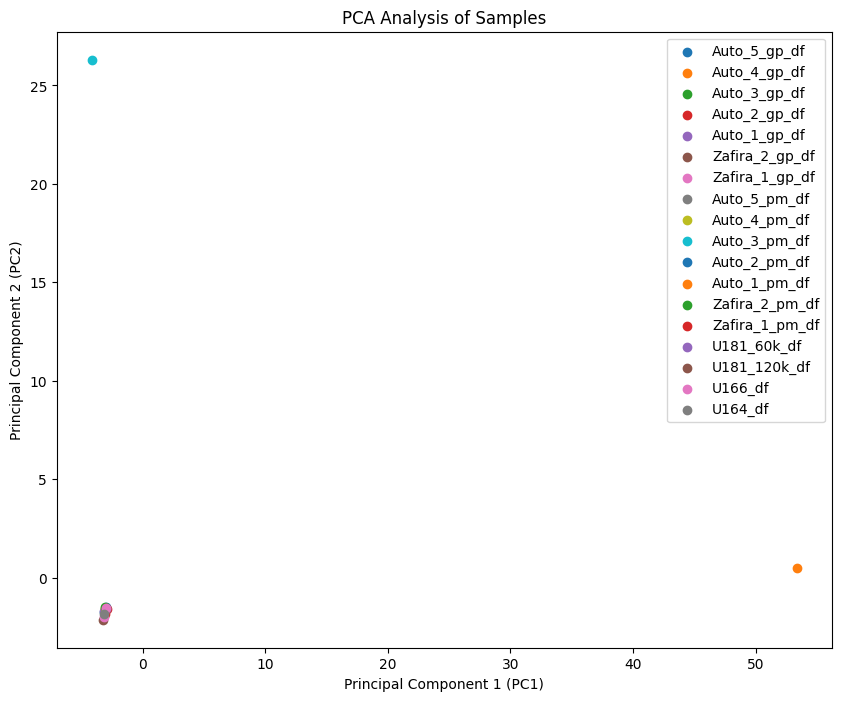

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)  # Transpose the dataframe to have samples as rows

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for sample in pca_df.index:
    plt.scatter(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], label=sample)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

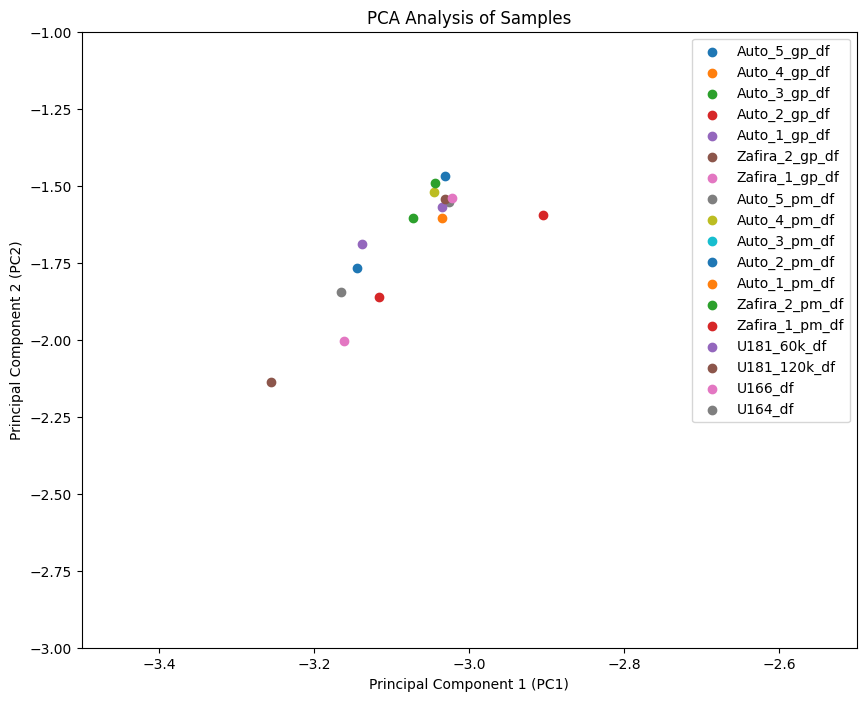

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)  # Transpose the dataframe to have samples as rows

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for sample in pca_df.index:
    plt.scatter(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], label=sample)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.xlim(-3.5, -2.5)
plt.ylim(-3, -1)
plt.show()

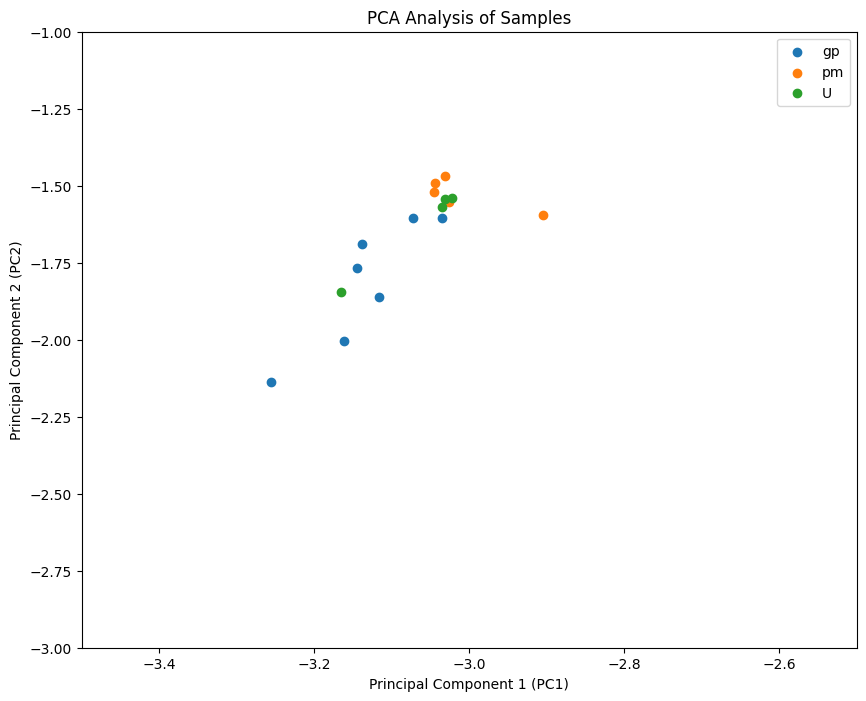

In [6]:
sample_classes = ['gp' if 'gp' in sample else 'pm' if 'pm' in sample else 'U' for sample in compound_sample_df.columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)
pca_df['Sample Class'] = sample_classes  # Add a column for sample classes

# Plot the PCA results with different colors for sample classes
plt.figure(figsize=(10, 8))
for sample_class in pca_df['Sample Class'].unique():
    subset = pca_df[pca_df['Sample Class'] == sample_class]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample_class)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.xlim(-3.5, -2.5)
plt.ylim(-3, -1)
plt.show()

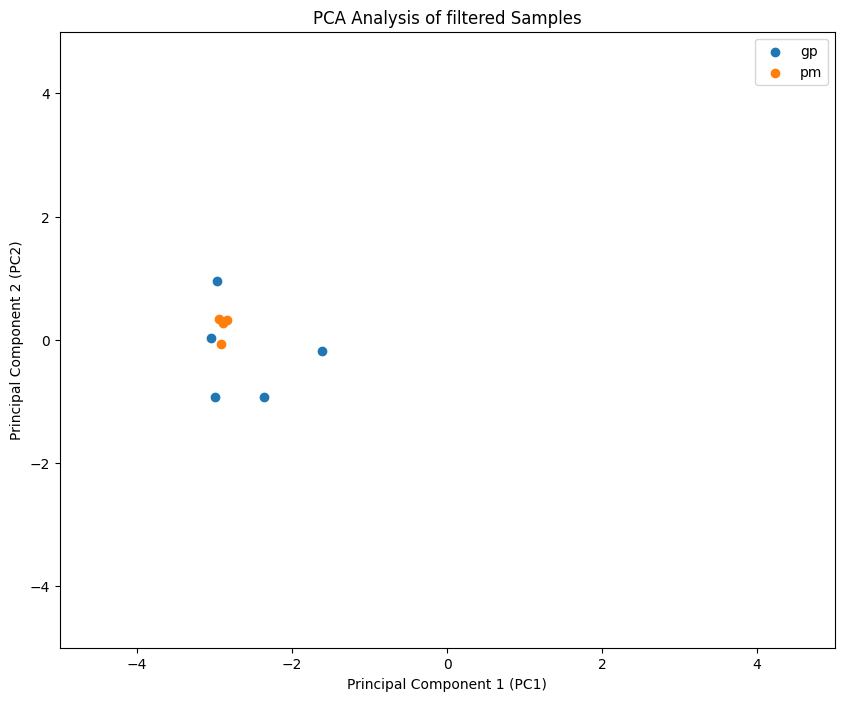

In [7]:
sample_classes = ['gp' if 'gp' in sample else 'pm' if 'pm' in sample else 'U' for sample in de_filtered_df.columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(de_filtered_df.T)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=de_filtered_df.columns)
pca_df['Sample Class'] = sample_classes  # Add a column for sample classes

# Plot the PCA results with different colors for sample classes
plt.figure(figsize=(10, 8))
for sample_class in pca_df['Sample Class'].unique():
    subset = pca_df[pca_df['Sample Class'] == sample_class]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample_class)

plt.title('PCA Analysis of filtered Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

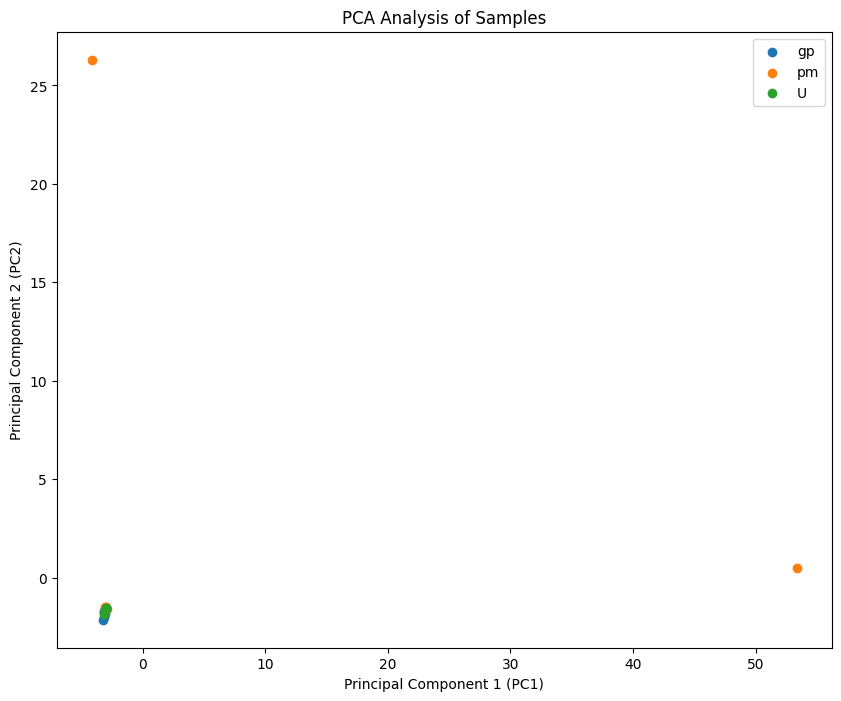

In [8]:
sample_classes = ['gp' if 'gp' in sample else 'pm' if 'pm' in sample else 'U' for sample in compound_sample_df.columns]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=compound_sample_df.columns)
pca_df['Sample Class'] = sample_classes  # Add a column for sample classes

# Plot the PCA results with different colors for sample classes
plt.figure(figsize=(10, 8))
for sample_class in pca_df['Sample Class'].unique():
    subset = pca_df[pca_df['Sample Class'] == sample_class]
    plt.scatter(subset['PC1'], subset['PC2'], label=sample_class)

plt.title('PCA Analysis of Samples')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

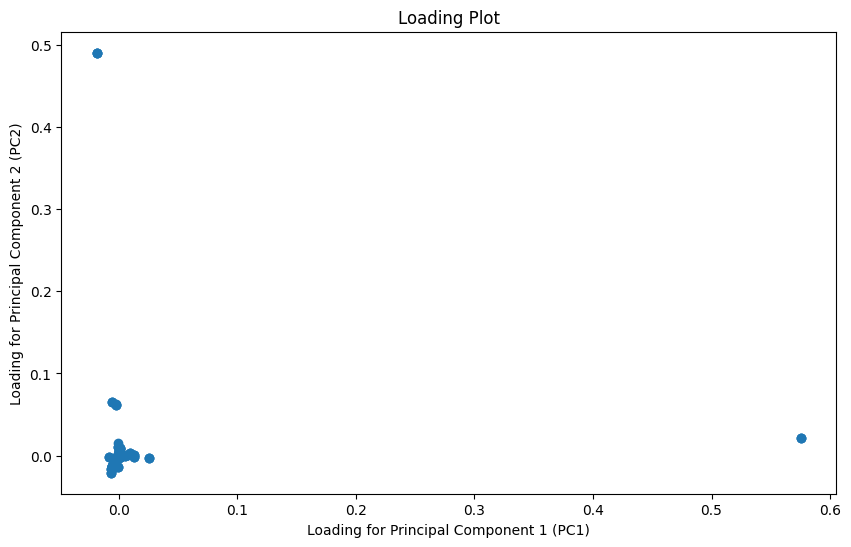

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')
plt.show()

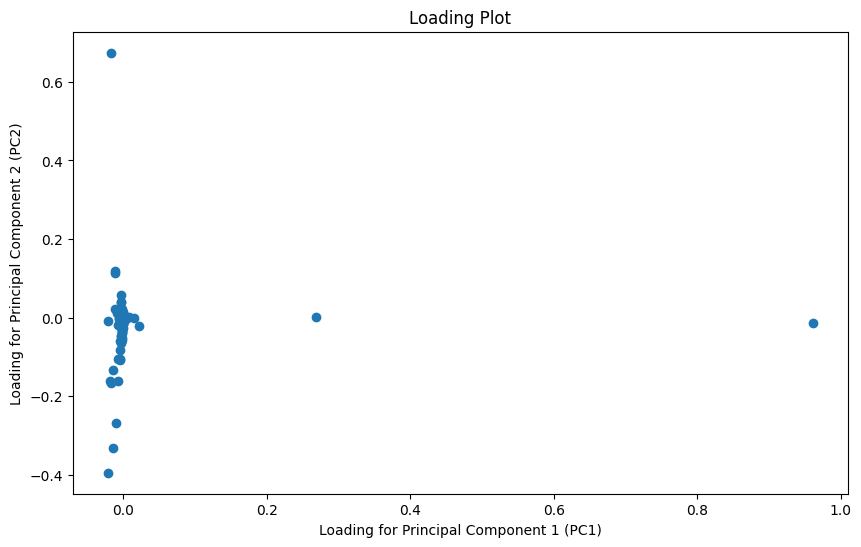

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(de_filtered_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=de_filtered_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')
plt.show()

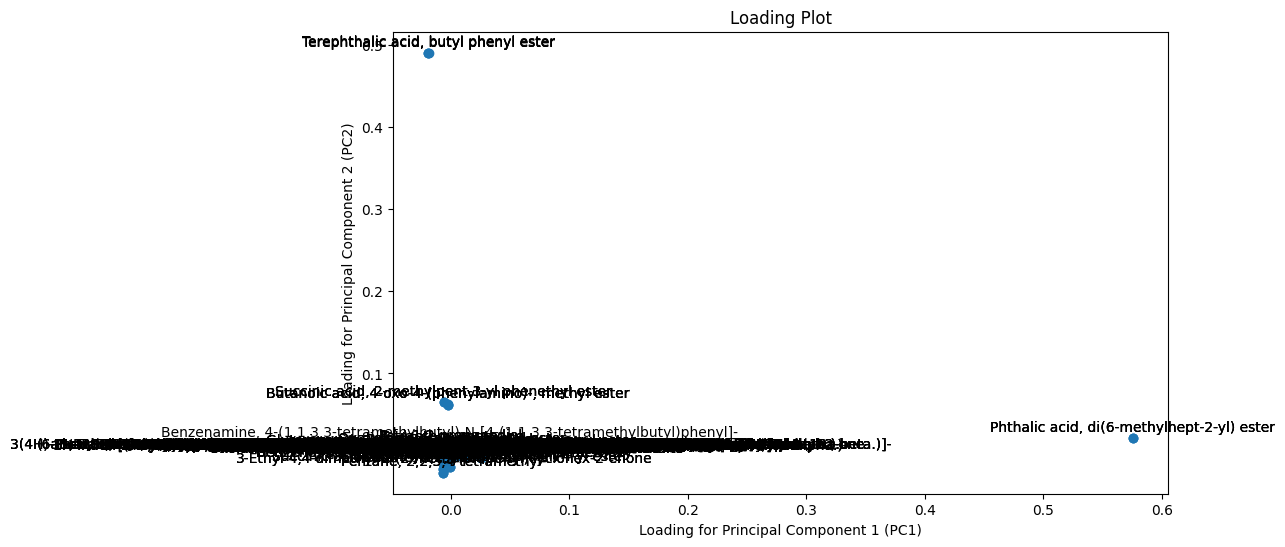

In [11]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')

# Annotate points with variable names for better interpretation
for variable, (x, y) in loadings_df.iterrows():
    plt.annotate(variable, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

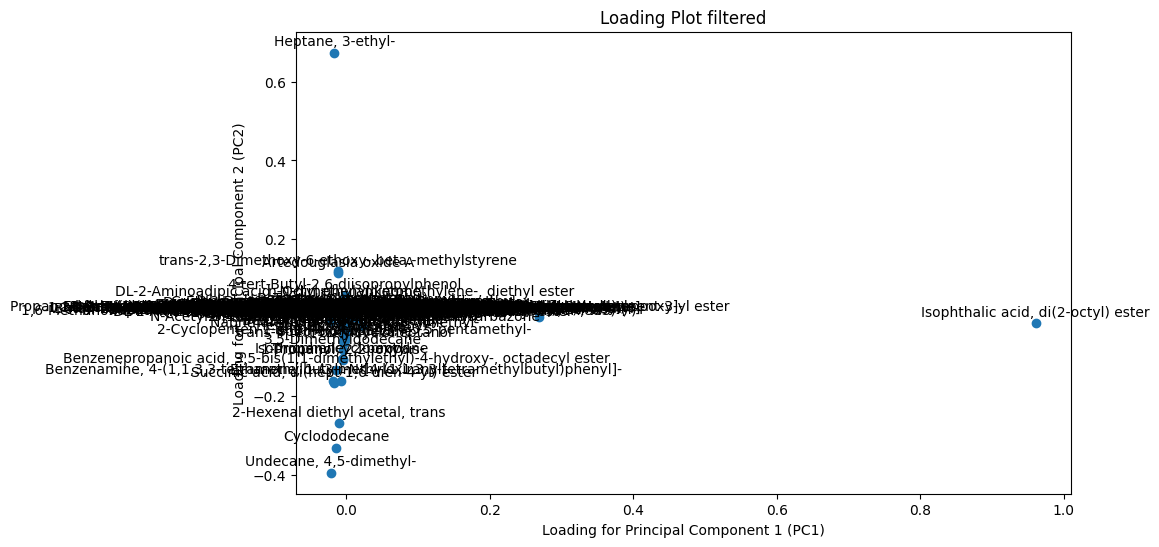

In [12]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(de_filtered_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=de_filtered_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot filtered')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')

# Annotate points with variable names for better interpretation
for variable, (x, y) in loadings_df.iterrows():
    plt.annotate(variable, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

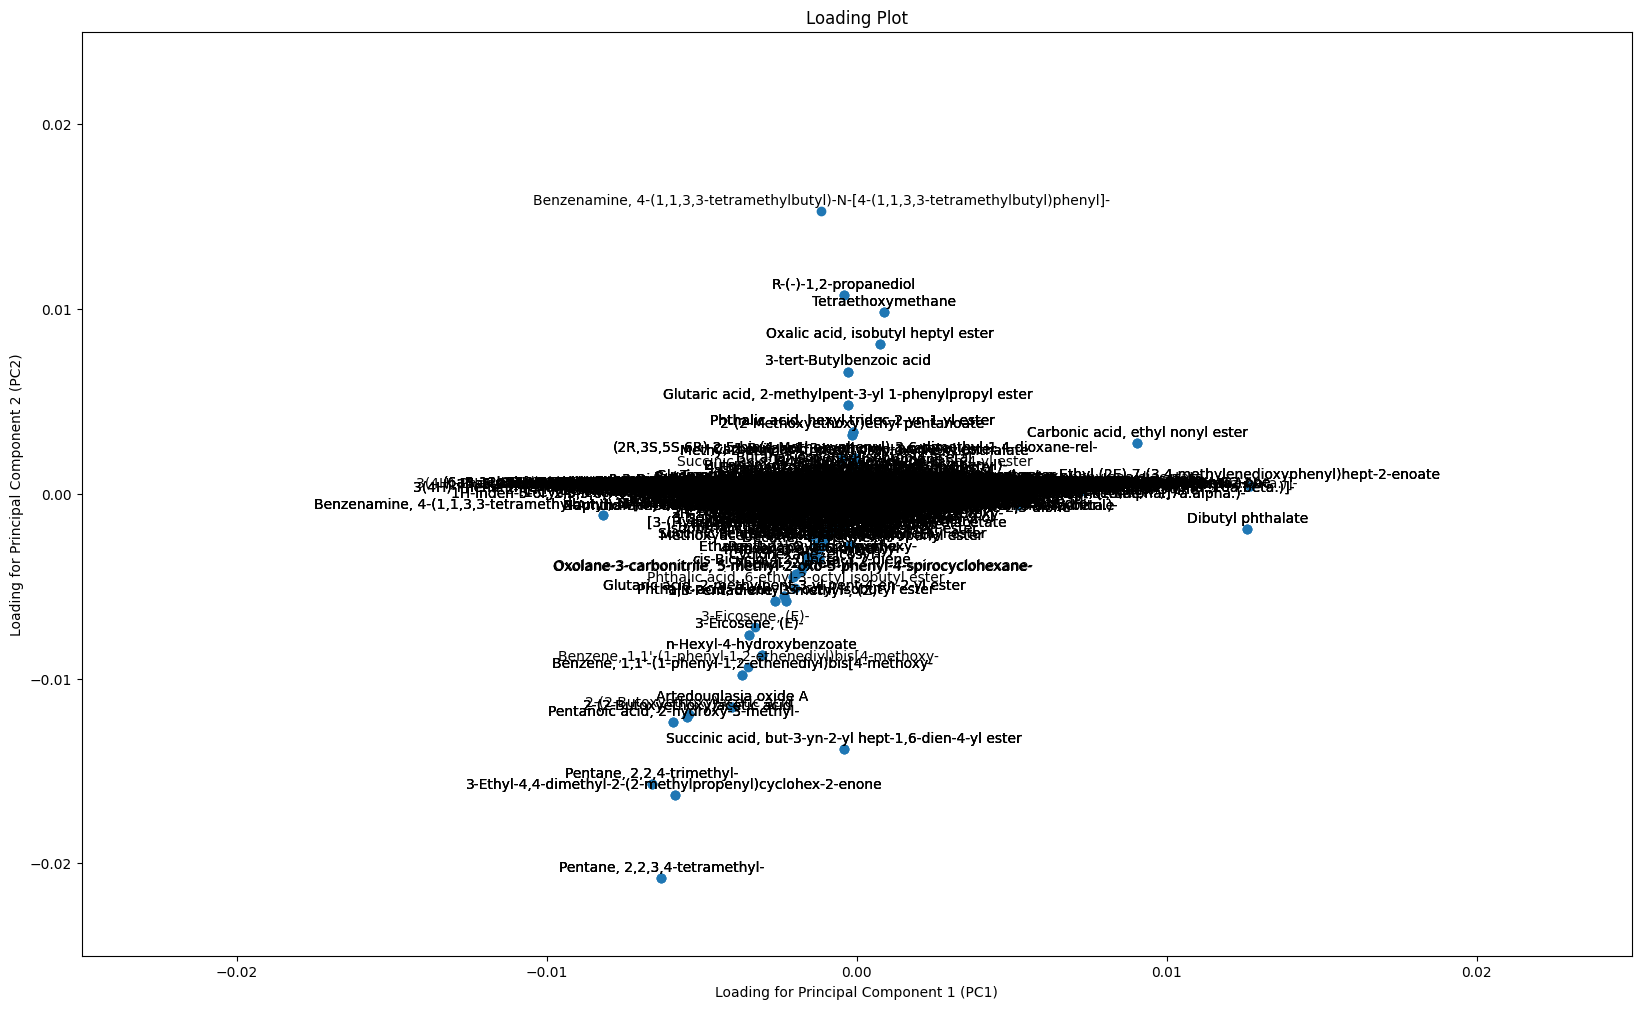

In [13]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(20, 12))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')

# Annotate points with variable names for better interpretation
for variable, (x, y) in loadings_df.iterrows():
    plt.annotate(variable, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlim(-0.025, 0.025)  # Set x-axis limits from 1 to 5
plt.ylim(-0.025, 0.025)  # Set y-axis limits from 0 to 12

plt.show()


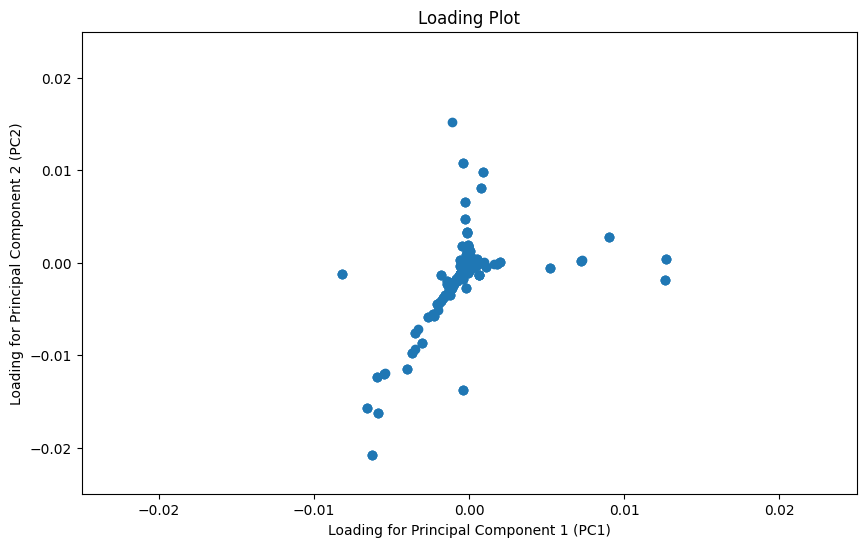

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])
plt.title('Loading Plot')
plt.xlabel('Loading for Principal Component 1 (PC1)')
plt.ylabel('Loading for Principal Component 2 (PC2)')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025)
plt.show()

<ipython-input-15-9da90ac2c259>:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_10_loadings = loadings_df.loc[top_10_variables]
<ipython-input-15-9da90ac2c259>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


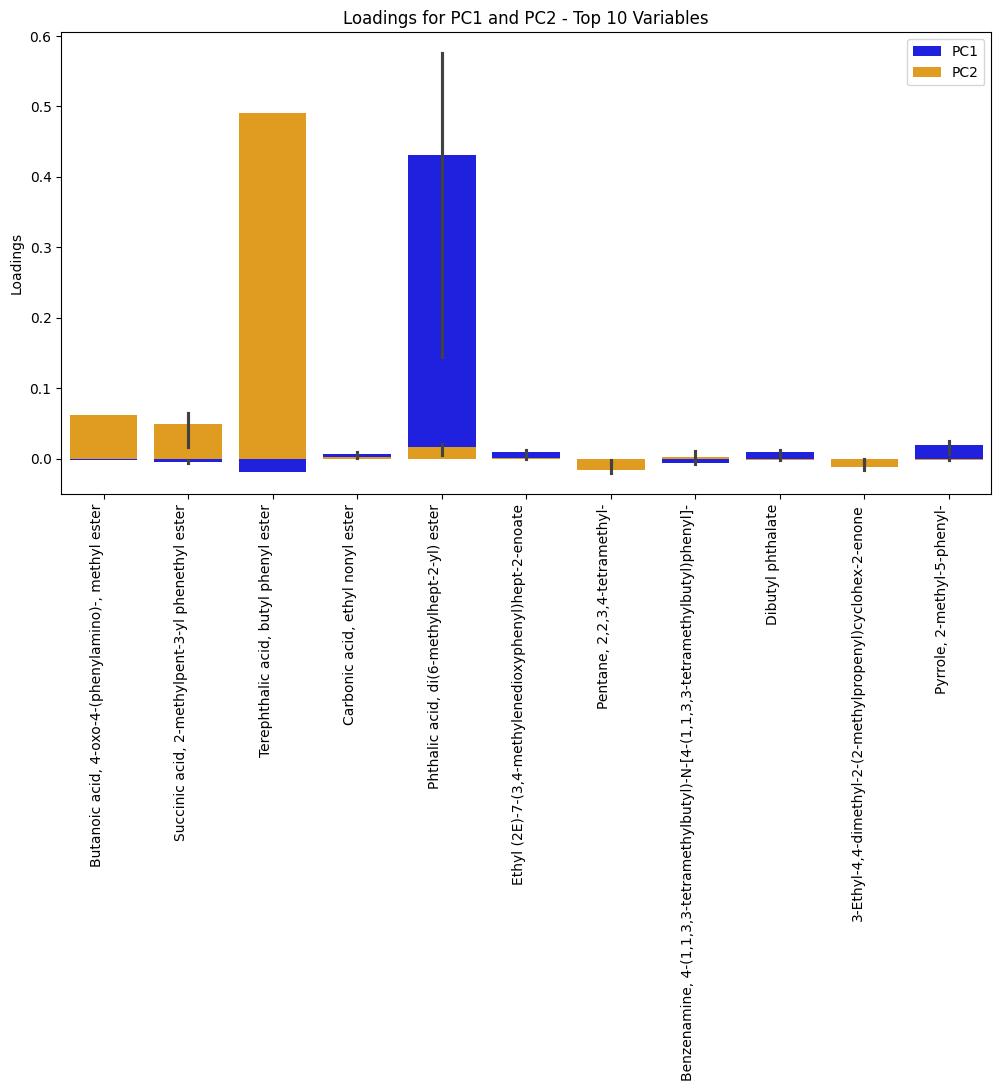

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compound_sample_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=compound_sample_df.index)

# Get the top 10 most important variables for PC1 and PC2
top_10_pc1 = loadings_df['PC1'].abs().nlargest(20)
top_10_pc2 = loadings_df['PC2'].abs().nlargest(20)

# Combine the top 10 variables for both PCs
top_10_variables = set(top_10_pc1.index) | set(top_10_pc2.index)

# Filter the loadings dataframe for the top 10 variables
top_10_loadings = loadings_df.loc[top_10_variables]

# Plot the bar plot inspired by the provided code
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC1'], color='blue', label='PC1', ax=ax)
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC2'], color='orange', label='PC2', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Loadings')
ax.set_title('Loadings for PC1 and PC2 - Top 10 Variables')
ax.legend()
plt.show()

<ipython-input-16-112efc131f10>:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_10_loadings = loadings_df.loc[top_10_variables]
<ipython-input-16-112efc131f10>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


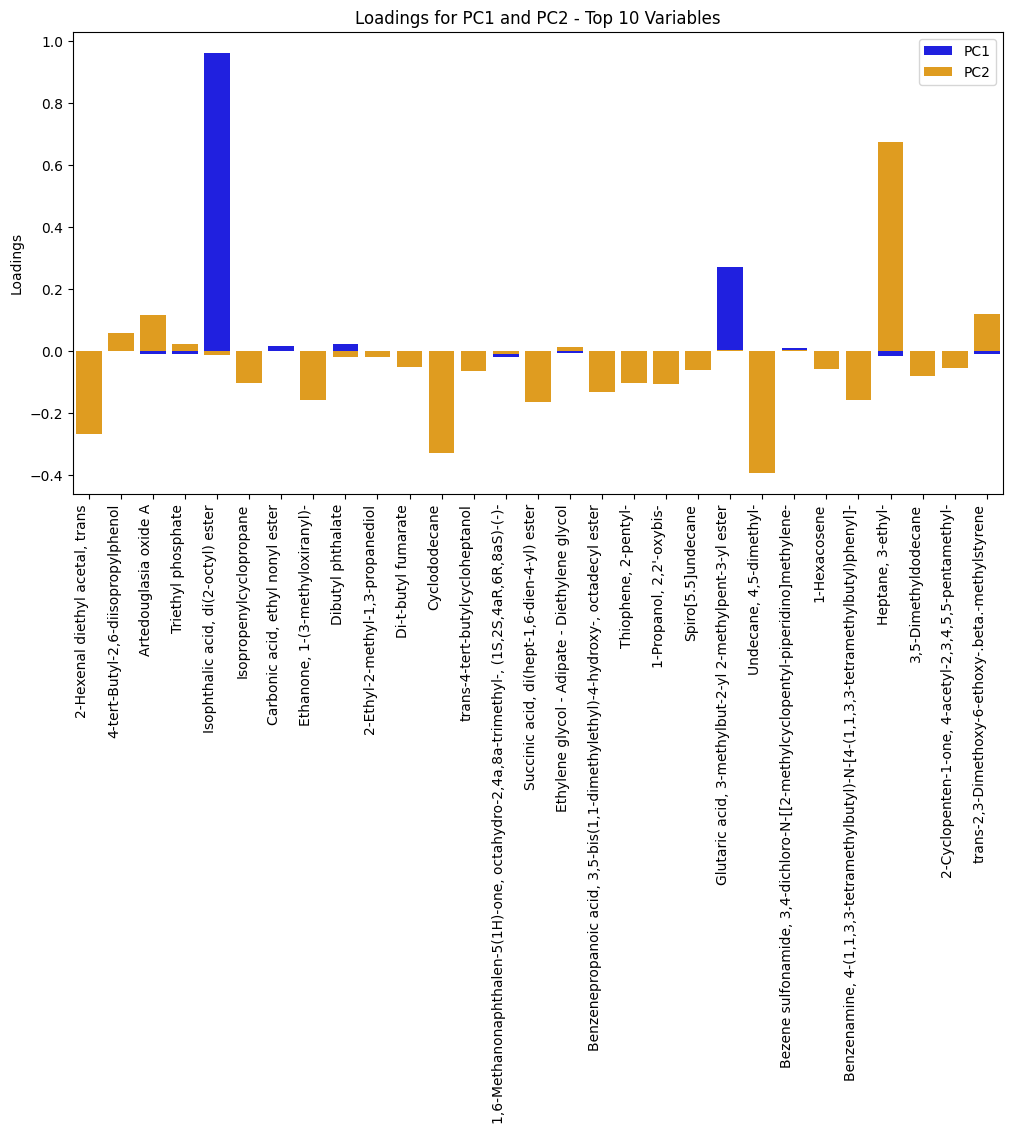

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(de_filtered_df.T)

# Create a dataframe with the loadings
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=de_filtered_df.index)

# Get the top 10 most important variables for PC1 and PC2
top_10_pc1 = loadings_df['PC1'].abs().nlargest(20)
top_10_pc2 = loadings_df['PC2'].abs().nlargest(20)

# Combine the top 10 variables for both PCs
top_10_variables = set(top_10_pc1.index) | set(top_10_pc2.index)

# Filter the loadings dataframe for the top 10 variables
top_10_loadings = loadings_df.loc[top_10_variables]

# Plot the bar plot inspired by the provided code
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC1'], color='blue', label='PC1', ax=ax)
sns.barplot(x=top_10_loadings.index, y=top_10_loadings['PC2'], color='orange', label='PC2', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Loadings')
ax.set_title('Loadings for PC1 and PC2 - Top 10 Variables')
ax.legend()
plt.show()

In [ ]:
print(pca_result)

[[-3.14463812 -1.76863293]
 [-3.03506492 -1.60452359]
 [-3.07302825 -1.6051175 ]
 [-3.11673184 -1.86222719]
 [-3.13838569 -1.68850905]
 [-3.25610512 -2.13687617]
 [-3.16158613 -2.00326848]
 [-3.02643579 -1.5541749 ]
 [-3.04581653 -1.52063061]
 [-4.12757719 26.30746392]
 [-3.03090196 -1.46889762]
 [53.35969452  0.48614456]
 [-3.04425596 -1.49065197]
 [-2.90490994 -1.59571285]
 [-3.03465802 -1.56858502]
 [-3.03097144 -1.54148717]
 [-3.02272655 -1.54019454]
 [-3.16590109 -1.8441189 ]]


In [ ]:
print(loadings_df)

                                                             PC1           PC2
Unnamed: 0                                                                    
4-Ethylphenylacetylene                             -1.294570e-05 -3.353200e-05
3-Quinolinecarbonitrile, 5,6,7,8-tetrahydro-       -3.071791e-07 -6.148743e-07
5,6-Dimethyl-1H-1,3-benzodiazole-2-carbaldehyde    -7.505123e-08 -1.585827e-07
2-Cyano-N-(2-hydroxy-5-methylphenyl)acetamide      -5.741913e-08 -1.196005e-07
1-(2-Vinylphenyl)ethanone                          -1.546503e-06 -3.682494e-06
...                                                          ...           ...
1,2-Propanedione, 1-phenyl-                        -1.913812e-05 -4.101583e-05
2H-1-Benzopyran-2-one, 3,4-dihydro-6-hydroxy-      -6.305557e-04 -1.657435e-03
2-Propyn-1-amine, N,N-di-2-propynyl-               -9.714151e-06 -2.514414e-05
1,2,5-Oxadiazol-3-amine, 4-(phenylmethoxy)-        -1.168366e-05 -2.750229e-05
3-Pyridinecarboxylic acid, 5-ethenyl-, methyl e... -